In [ ]:
#importing libraries
import pandas as pd  #for data
from sklearn.cluster import KMeans, BisectingKMeans, MiniBatchKMeans #models
from sklearn.metrics import davies_bouldin_score #DBI_index
import numpy as np #array
import matplotlib.pyplot as plt #plottig


In [ ]:
#Reading data
import pandas as pd

file_path = r'well10A.xlsx'
log_data = pd.read_excel(file_path)

#columns
depth = log_data['depth']
GR = log_data['gamma (gAPI)']
NPHI = log_data['neutron porosity']
RHOB = log_data['density (g/cc)']
Velo = log_data['velocity (km/s)']

# Drop depth initially
Data = log_data.drop(columns=['depth'])
print(Data.shape)

(1007, 4)


In [ ]:
Data

,density (g/cc),gamma (gAPI),velocity (km/s),neutron porosity
0,1.6598,62.3546,1.480400,68.7116
1,1.6935,62.4688,1.477700,61.8872
2,1.7260,64.1952,1.478300,62.2842
3,1.7268,66.5269,1.479900,64.1890
4,1.7177,66.4611,1.480000,62.3948
...,...,...,...,...
1002,1.7955,87.4080,1.444471,56.4695
1003,1.7885,87.9287,1.446163,60.6422
1004,1.8138,92.9249,1.447854,58.7947
1005,1.8366,93.9501,1.449546,60.9759


Bisecting K-Means: Best DBI = 0.8727 at 5 clusters
K-Means: Best DBI = 0.7549 at 4 clusters
Mini-Batch K-Means: Best DBI = 0.8061 at 7 clusters


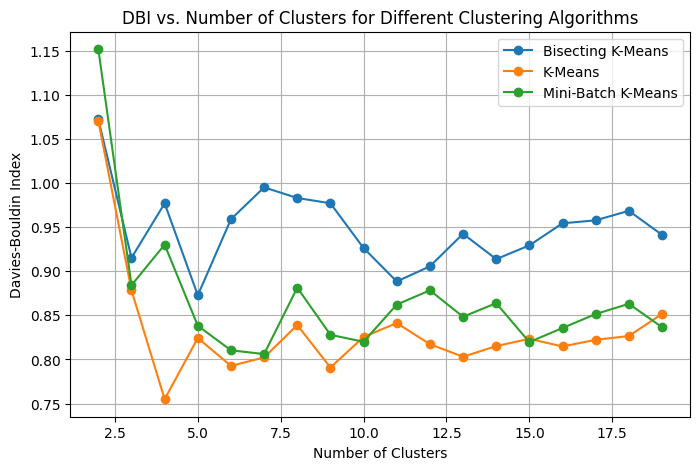

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans
from sklearn.metrics import davies_bouldin_score

# Define clustering models
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
    "Mini-Batch K-Means": MiniBatchKMeans
}

# Range of clusters to evaluate
n_clusters_list = np.arange(2, 20)

# Dictionary to store results for each algorithm
dbi_results = {name: [] for name in clustering_algorithms.keys()}
best_clusters = {}

# Loop through cluster values
for i in n_clusters_list:
    for name, Algorithm in clustering_algorithms.items():
        # Fit model
        algo = Algorithm(n_clusters=i, random_state=0, n_init=10)
        algo.fit(Data)

        # Compute DBI
        db_index = davies_bouldin_score(Data, algo.labels_)

        # Store result
        dbi_results[name].append((i, db_index))  # Store cluster number with DBI

# Find and print the minimum DBI for each algorithm
for name, values in dbi_results.items():
    best_n_clusters, min_dbi = min(values, key=lambda x: x[1])  # Find min DBI
    best_clusters[name] = (best_n_clusters, min_dbi)

    print(f"{name}: Best DBI = {min_dbi:.4f} at {best_n_clusters} clusters")

# Plot DBI values for all models
plt.figure(figsize=(8, 5))

for name, values in dbi_results.items():
    clusters, dbi_values = zip(*values)  # Unpack cluster numbers and DBI scores
    plt.plot(clusters, dbi_values, marker='o', linestyle='-', label=name)

plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("DBI vs. Number of Clusters for Different Clustering Algorithms")
plt.legend()
plt.grid(True)
plt.show()


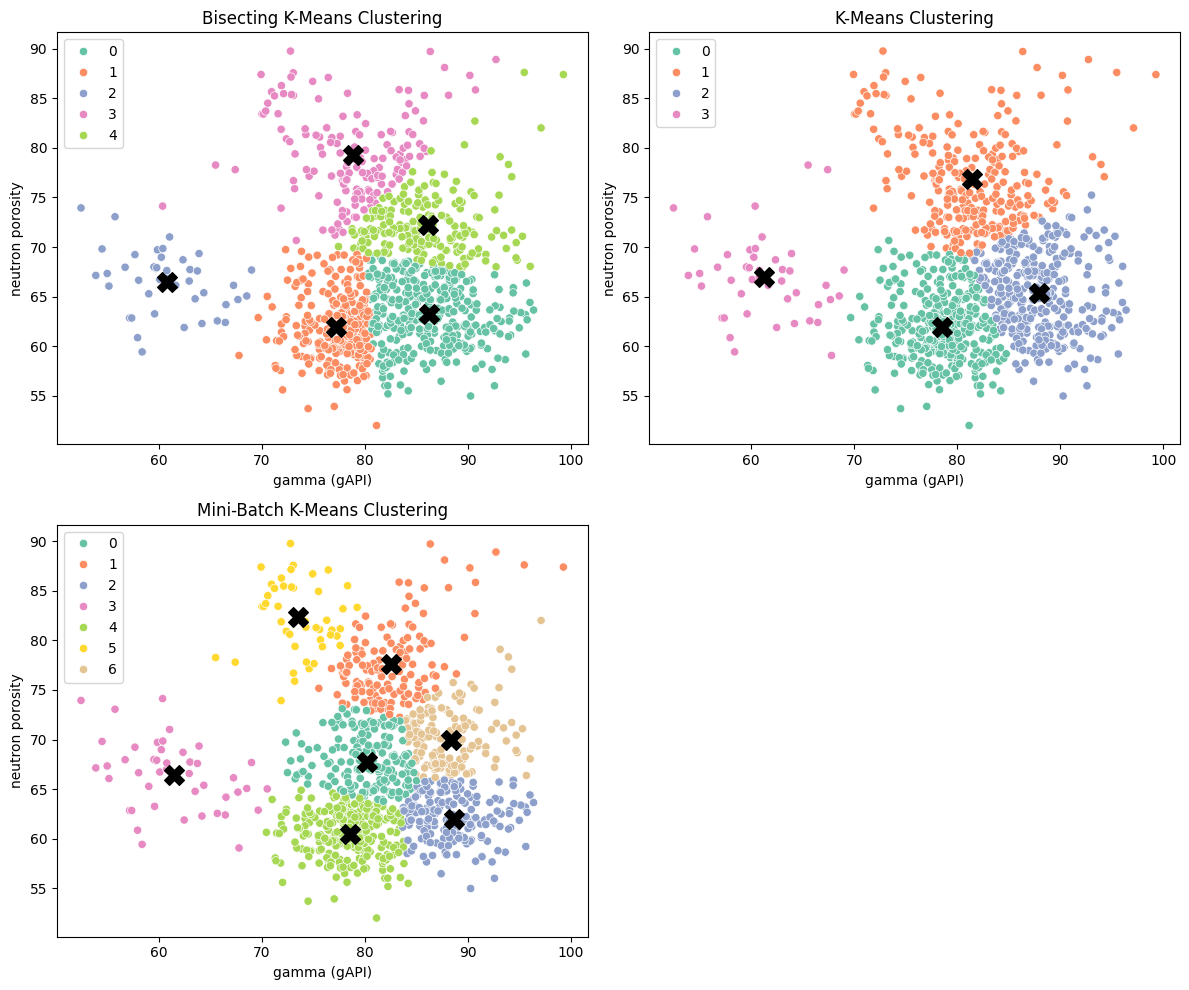

In [ ]:
#Compring optimal clustering of KMeans, BisectingKmeans, MiniBatchkmeans
# Fit Bisecting K-Means
BisectingKMeansModel_optimal = BisectingKMeans(n_clusters=5, random_state=0, n_init=10).fit(Data)
labels_Bisecting = BisectingKMeansModel_optimal.labels_
centroids_Bisecting = BisectingKMeansModel_optimal.cluster_centers_

# Fit K-Means
KMeans_model = KMeans(n_clusters=4, random_state=0, n_init=10).fit(Data)
labels_KMeans = KMeans_model.labels_
centroids_KMeans = KMeans_model.cluster_centers_

# Fit Mini-Batch K-Means
MiniBatchKMeans_model = MiniBatchKMeans(n_clusters=7, random_state=0, n_init=10).fit(Data)
labels_MiniBatch = MiniBatchKMeans_model.labels_
centroids_MiniBatch = MiniBatchKMeans_model.cluster_centers_

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bisecting K-Means Scatter Plot
sns.scatterplot(data=Data, x='gamma (gAPI)', y='neutron porosity', hue=labels_Bisecting, palette='Set2', ax=axes[0, 0])
axes[0, 0].scatter(centroids_Bisecting[:, 1], centroids_Bisecting[:, 3], c='black', marker='X', s=200, label='Centroids')
axes[0, 0].set_title("Bisecting K-Means Clustering")

# K-Means Scatter Plot
sns.scatterplot(data=Data, x='gamma (gAPI)', y='neutron porosity', hue=labels_KMeans, palette='Set2', ax=axes[0, 1])
axes[0, 1].scatter(centroids_KMeans[:, 1], centroids_KMeans[:, 3], c='black', marker='X', s=200, label='Centroids')
axes[0, 1].set_title("K-Means Clustering")

# Mini-Batch K-Means Scatter Plot (Centered in the second row)
sns.scatterplot(data=Data, x='gamma (gAPI)', y='neutron porosity', hue=labels_MiniBatch, palette='Set2', ax=axes[1, 0])
axes[1, 0].scatter(centroids_MiniBatch[:, 1], centroids_MiniBatch[:, 3], c='black', marker='X', s=200, label='Centroids')
axes[1, 0].set_title("Mini-Batch K-Means Clustering")

# Hide the fourth subplot (bottom right) as we have only three models
axes[1, 1].axis("off")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


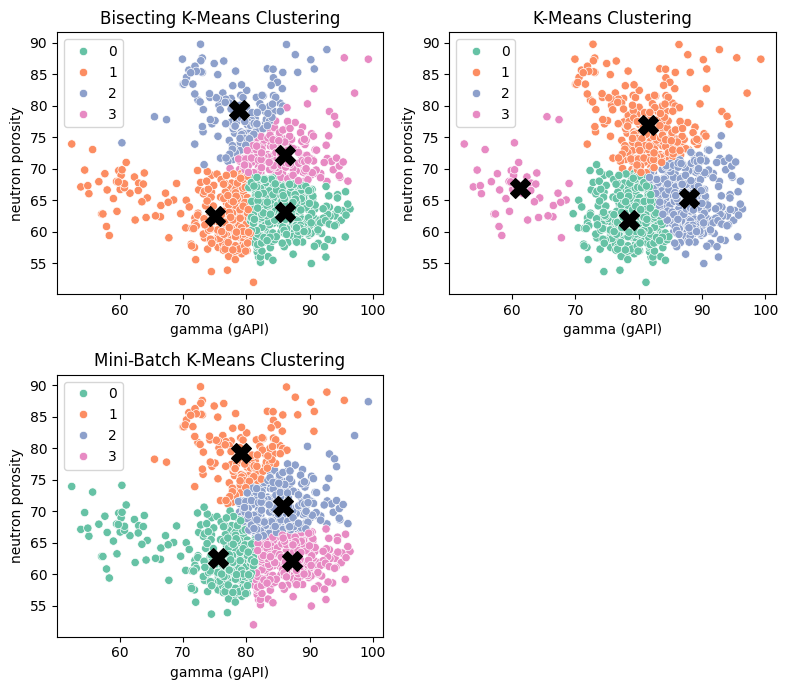

In [ ]:
#Comparing algos for fixed cluster value-4
# Fit Bisecting K-Means
BisectingKMeansModel_optimal = BisectingKMeans(n_clusters=4, random_state=0, n_init=10).fit(Data)
labels_Bisecting = BisectingKMeansModel_optimal.labels_
centroids_Bisecting = BisectingKMeansModel_optimal.cluster_centers_

# Fit K-Means
KMeans_model = KMeans(n_clusters=4, random_state=0, n_init=10).fit(Data)
labels_KMeans = KMeans_model.labels_
centroids_KMeans = KMeans_model.cluster_centers_

# Fit Mini-Batch K-Means
MiniBatchKMeans_model = MiniBatchKMeans(n_clusters=4, random_state=0, n_init=10).fit(Data)
labels_MiniBatch = MiniBatchKMeans_model.labels_
centroids_MiniBatch = MiniBatchKMeans_model.cluster_centers_

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(8, 7))

# Bisecting K-Means Scatter Plot
sns.scatterplot(data=Data, x='gamma (gAPI)', y='neutron porosity', hue=labels_Bisecting, palette='Set2', ax=axes[0, 0])
axes[0, 0].scatter(centroids_Bisecting[:, 1], centroids_Bisecting[:, 3], c='black', marker='X', s=200, label='Centroids')
axes[0, 0].set_title("Bisecting K-Means Clustering")

# K-Means Scatter Plot
sns.scatterplot(data=Data, x='gamma (gAPI)', y='neutron porosity', hue=labels_KMeans, palette='Set2', ax=axes[0, 1])
axes[0, 1].scatter(centroids_KMeans[:, 1], centroids_KMeans[:, 3], c='black', marker='X', s=200, label='Centroids')
axes[0, 1].set_title("K-Means Clustering")

# Mini-Batch K-Means Scatter Plot (Centered in the second row)
sns.scatterplot(data=Data, x='gamma (gAPI)', y='neutron porosity', hue=labels_MiniBatch, palette='Set2', ax=axes[1, 0])
axes[1, 0].scatter(centroids_MiniBatch[:, 1], centroids_MiniBatch[:, 3], c='black', marker='X', s=200, label='Centroids')
axes[1, 0].set_title("Mini-Batch K-Means Clustering")

# Hide the fourth subplot (bottom right) as we have only three models
axes[1, 1].axis("off")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


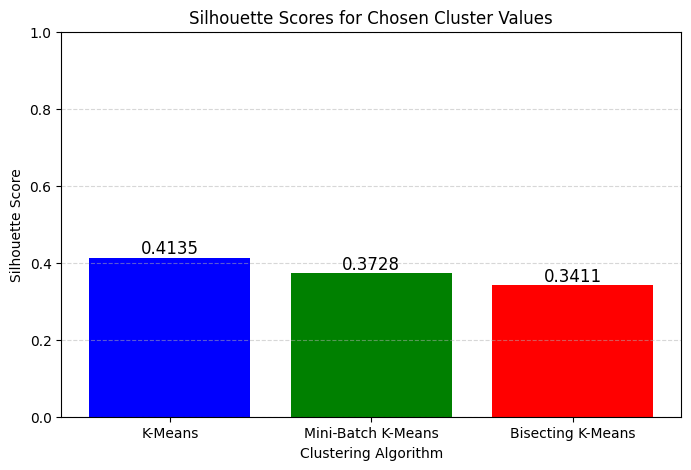

In [ ]:
#silhouettes comparison

# Fit K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(Data)
score_kmeans = silhouette_score(Data, kmeans.labels_, metric="euclidean")

# Fit Mini-Batch K-Means with 7 clusters
minibatch_kmeans = MiniBatchKMeans(n_clusters=7, random_state=0, n_init=10).fit(Data)
score_minibatch = silhouette_score(Data, minibatch_kmeans.labels_, metric="euclidean")

# Fit Bisecting K-Means with 5 clusters
bisecting_kmeans = BisectingKMeans(n_clusters=5, random_state=0, n_init=10).fit(Data)
score_bisecting = silhouette_score(Data, bisecting_kmeans.labels_, metric="euclidean")

# Define chosen cluster numbers
chosen_clusters = [4, 7, 5]
silhouette_scores = [score_kmeans, score_minibatch, score_bisecting]
models = ["K-Means", "Mini-Batch K-Means", "Bisecting K-Means"]

# Plot Silhouette Scores for the chosen cluster values
plt.figure(figsize=(8, 5))
plt.bar(models, silhouette_scores, color=["blue", "green", "red"])

# Label the bars with silhouette scores
for i, score in enumerate(silhouette_scores):
    plt.text(i, score + 0.01, f"{score:.4f}", ha='center', fontsize=12)

# Formatting
plt.xlabel("Clustering Algorithm")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Chosen Cluster Values")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


K-Means: Silhouette Score = 0.4135 for n_clusters = 4


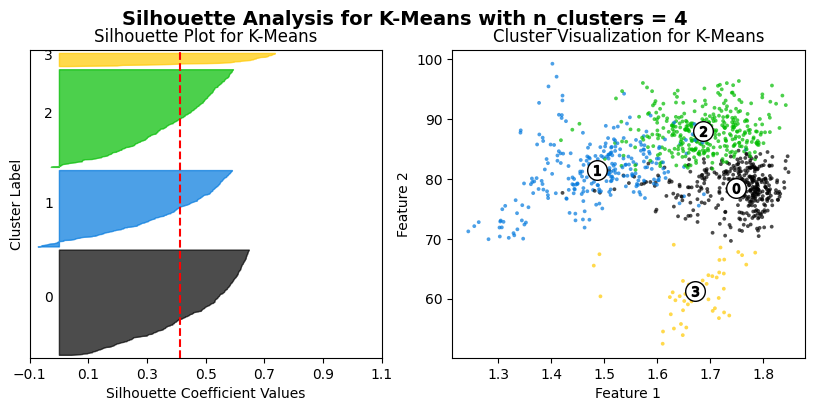

Mini-Batch K-Means: Silhouette Score = 0.3728 for n_clusters = 7


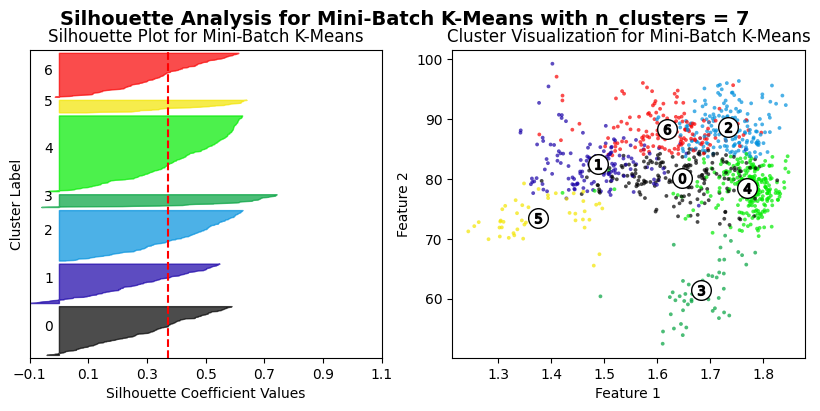

Bisecting K-Means: Silhouette Score = 0.3411 for n_clusters = 5


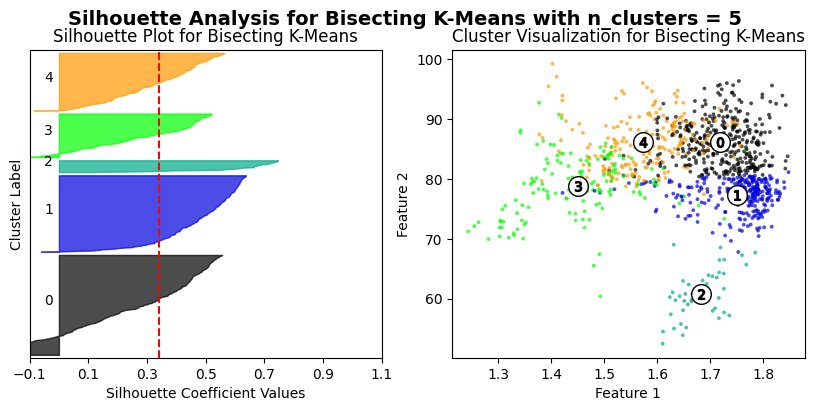

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Define the clustering algorithms and their selected cluster numbers
clustering_algorithms = {
    "K-Means": (KMeans(n_clusters=4, random_state=0, n_init=10), 4),
    "Mini-Batch K-Means": (MiniBatchKMeans(n_clusters=7, random_state=0, n_init=10), 7),
    "Bisecting K-Means": (BisectingKMeans(n_clusters=5, random_state=0, n_init=10), 5)
}

# Loop through each clustering algorithm
for name, (model, n_clusters) in clustering_algorithms.items():
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

    # Fit model and predict clusters
    cluster_labels = model.fit_predict(Data)

    # Compute silhouette score
    silhouette_avg = silhouette_score(Data, cluster_labels)
    print(f"{name}: Silhouette Score = {silhouette_avg:.4f} for n_clusters = {n_clusters}")

    # Compute silhouette values for each sample
    sample_silhouette_values = silhouette_samples(Data, cluster_labels)

    # Set up the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(Data) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Extract silhouette scores for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Space between clusters

    # Silhouette plot settings
    ax1.set_title(f"Silhouette Plot for {name}")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")  # Average silhouette score line
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2nd Plot: Cluster visualization
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Data.iloc[:, 0], Data.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Plot cluster centers
    centers = model.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    # Clustering plot settings
    ax2.set_title(f"Cluster Visualization for {name}")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")

    plt.suptitle(f"Silhouette Analysis for {name} with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

    plt.show()


For n_clusters = 4, The average silhouette_score is: 0.4135


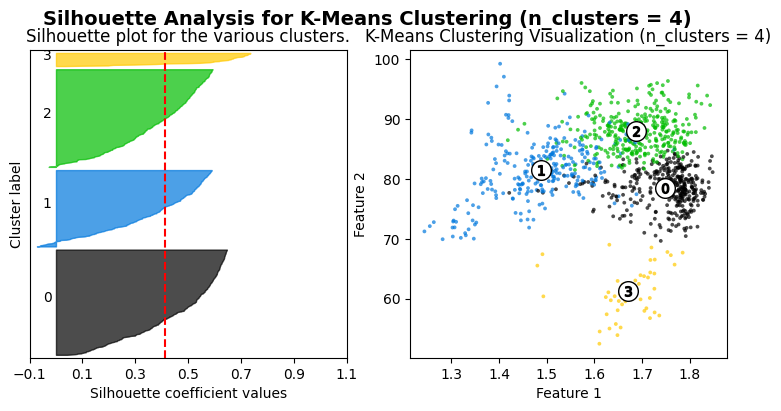

For n_clusters = 5, The average silhouette_score is: 0.3930


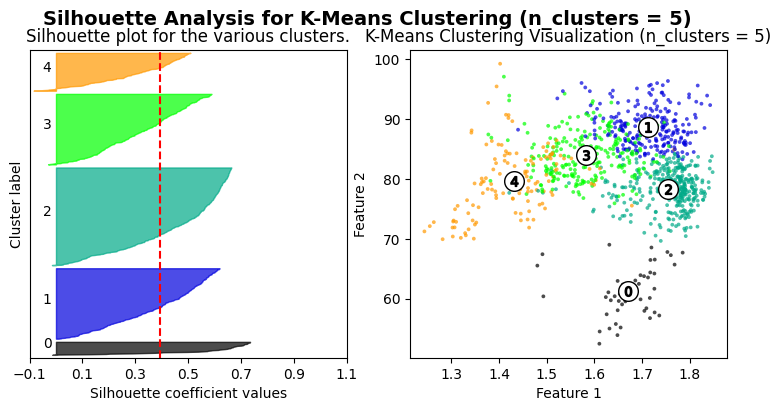

For n_clusters = 6, The average silhouette_score is: 0.3806


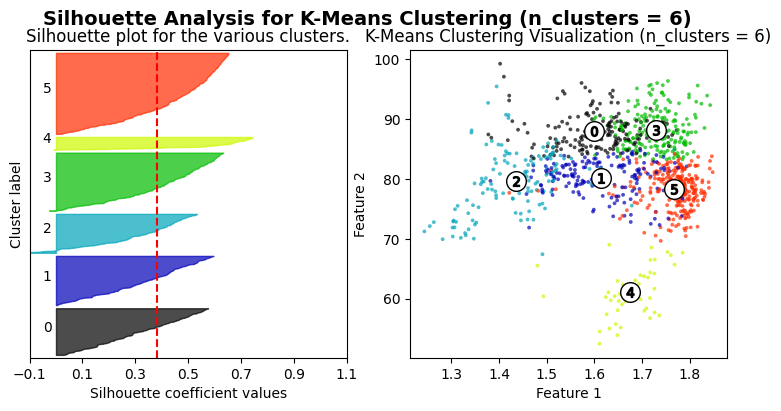

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Define the range of clusters to evaluate
range_n_clusters = np.arange(4, 7)  # Clusters from 3 to 10

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

    # The 1st subplot: Silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(Data) + (n_clusters + 1) * 10])  # Space between clusters

    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(Data)

    # Compute silhouette score
    silhouette_avg = silhouette_score(Data, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg:.4f}")

    # Compute silhouette values for each sample
    sample_silhouette_values = silhouette_samples(Data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Extract silhouette scores for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label clusters in the silhouette plot
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Space between clusters

    # Silhouette plot settings
    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")  # Average silhouette score line
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2nd Plot: Clustering visualization
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Data.iloc[:, 0], Data.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Plot cluster centers
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    # Clustering plot settings
    ax2.set_title(f"K-Means Clustering Visualization (n_clusters = {n_clusters})")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")

    plt.suptitle(f"Silhouette Analysis for K-Means Clustering (n_clusters = {n_clusters})",
                 fontsize=14, fontweight="bold")

    plt.show()


In [2]:
## Load .xlsx data
import pandas as pd

file_path = r'/content/well10A (1).xlsx'
log_data = pd.read_excel(file_path)

#columns
depth = log_data['depth']
GR = log_data['gamma (gAPI)']
NPHI = log_data['neutron porosity']
RHOB = log_data['density (g/cc)']
Velo = log_data['velocity (km/s)']

# Drop depth initially
Data = log_data.drop(columns=['depth'])
print(Data.shape)


(1007, 4)


In [3]:
from sklearn.cluster import KMeans

#KMeans_model = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(Data.loc[:, Data.columns != 'depth'])
KMeans_model=KMeans(n_clusters=6, random_state=0, init= 'random',n_init=10).fit(Data)

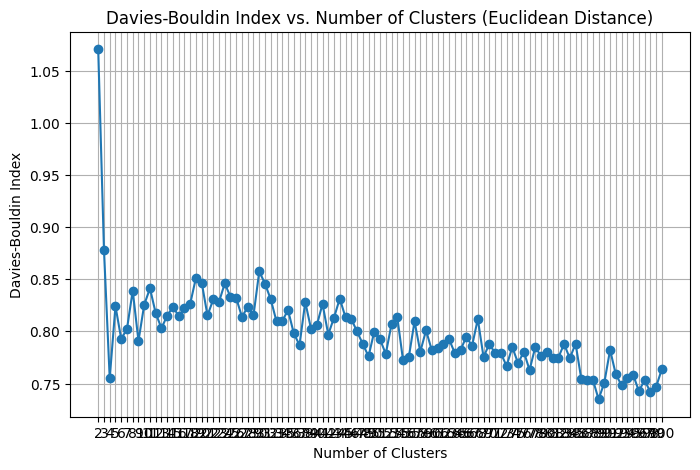

minimum dbi value 0.7349568480944537


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

cluster=[]
index=[]
#Looping from 1 to 100

for i in range(2,101):
    KMean_loop = KMeans(n_clusters=i, random_state=0, n_init=10).fit(Data)
    labels_loop=KMean_loop.labels_
    db_index = davies_bouldin_score(Data, labels_loop)
    #print(f"Number of clusters: {i}, Davies-Bouldin Index: {db_index}")
    cluster.append(i)
    index.append(db_index)

plt.figure(figsize=(8, 5))
plt.plot(cluster, index, marker='o', linestyle='-')
plt.xticks(range(2, 101))  # Set x-axis ticks to be integers from 2 to 20
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters (Euclidean Distance)')
plt.grid(True)
plt.show()

print('minimum dbi value',min(index))

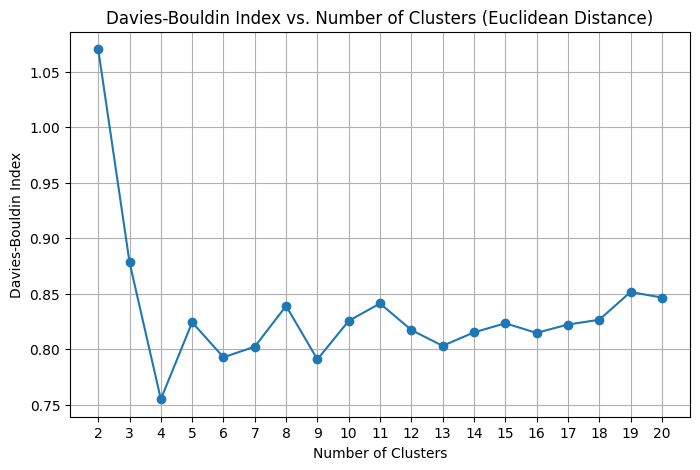

minimum dbi value 0.7549011016711306


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np

cluster=[]
index=[]
#Looping from 1 to 100

for i in range(2,21):
    KMean_loop = KMeans(n_clusters=i, random_state=0, n_init=10).fit(Data)
    labels_loop=KMean_loop.labels_
    db_index = davies_bouldin_score(Data, labels_loop)
    #print(f"Number of clusters: {i}, Davies-Bouldin Index: {db_index}")
    cluster.append(i)
    index.append(db_index)

plt.figure(figsize=(8, 5))
plt.plot(cluster, index, marker='o', linestyle='-')
plt.xticks(range(2, 21))  # Set x-axis ticks to be integers from 2 to 20
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters (Euclidean Distance)')
plt.grid(True)
plt.show()

print('minimum dbi value',min(index))

In [7]:
import numpy as np
from sklearn.utils.validation import check_X_y
from sklearn.preprocessing import LabelEncoder
#from sklearn.utils import check_number_of_labels
from sklearn.utils import _safe_indexing

def manhattan_distance(p, q):
    """Compute the Manhattan distance between two points."""
    return np.sum(np.abs(p - q))

def pairwise_manhattan_distances(X, Y=None):
    """Compute the Manhattan distance between all pairs in X (or X and Y)."""
    if Y is None:
        Y = X
    return np.array([[manhattan_distance(x, y) for y in Y] for x in X])

def davies_bouldin_score_manhattan(X, labels):
    """Compute the Davies-Bouldin score using Manhattan distance."""
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)
    #check_number_of_labels(n_labels, n_samples)

    intra_dists = np.zeros(n_labels)
    centroids = np.zeros((n_labels, X.shape[1]), dtype=float)

    # Compute centroids and intra-cluster distances
    for k in range(n_labels):
        cluster_k = _safe_indexing(X, labels == k)
        centroid = cluster_k.mean(axis=0)
        centroids[k] = centroid
        intra_dists[k] = np.mean([manhattan_distance(point, centroid) for point in cluster_k])

    # Compute centroid-to-centroid distances using Manhattan distance
    centroid_distances = pairwise_manhattan_distances(centroids)

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    centroid_distances[centroid_distances == 0] = np.inf  # Prevent division by zero
    combined_intra_dists = intra_dists[:, None] + intra_dists
    scores = np.max(combined_intra_dists / centroid_distances, axis=1)

    return np.mean(scores)


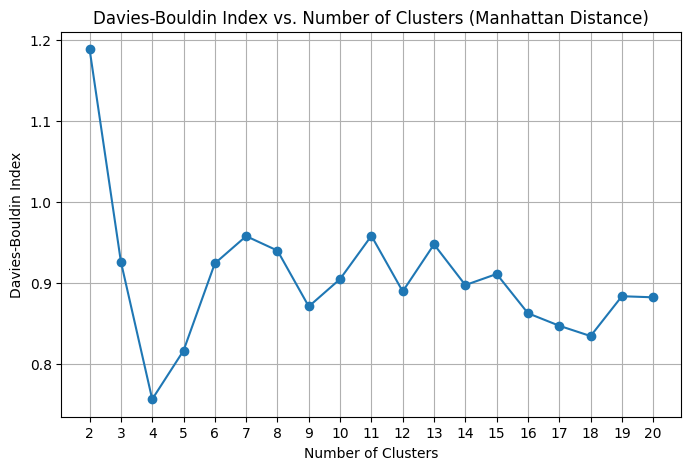

Minimum DBI score 0.7566356530338049


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np


# Lists to store cluster numbers and DBI values
cluster = []
index = []

# Looping through different cluster numbers
for i in range(2, 21):
    KMean_loop = KMeans(n_clusters=i, random_state=0, n_init=10,init ='random').fit(Data)
    labels_loop = KMean_loop.labels_
    db_index = davies_bouldin_score_manhattan(Data, labels_loop)  # Use custom Manhattan DBI function
    cluster.append(i)
    index.append(db_index)
plt.figure(figsize=(8, 5))
plt.plot(cluster, index, marker='o', linestyle='-')
plt.xticks(range(2, 21))  # Set x-axis ticks to be integers from 2 to 20
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters (Manhattan Distance)')
plt.grid(True)
plt.show()

print('Minimum DBI score',min(index))

In [9]:
import numpy as np
from sklearn.utils.validation import check_X_y
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import _safe_indexing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def chebyshev_distance(p, q):
    """Compute the Chebyshev distance between two points."""
    return np.max(np.abs(p - q))

def pairwise_chebyshev_distances(X, Y=None):
    """Compute the pairwise Chebyshev distances between all points in X (or X and Y)."""
    if Y is None:
        Y = X
    return np.array([[chebyshev_distance(x, y) for y in Y] for x in X])

def davies_bouldin_score_chebyshev(X, labels):
    """Compute the Davies-Bouldin score using Chebyshev distance."""
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)

    intra_dists = np.zeros(n_labels)
    centroids = np.zeros((n_labels, X.shape[1]), dtype=float)

    # Compute centroids and intra-cluster distances
    for k in range(n_labels):
        cluster_k = _safe_indexing(X, labels == k)
        centroid = cluster_k.mean(axis=0)
        centroids[k] = centroid
        intra_dists[k] = np.mean([chebyshev_distance(point, centroid) for point in cluster_k])

    # Compute centroid-to-centroid distances using Chebyshev distance
    centroid_distances = pairwise_chebyshev_distances(centroids)

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    centroid_distances[centroid_distances == 0] = np.inf  # Prevent division by zero
    combined_intra_dists = intra_dists[:, None] + intra_dists
    scores = np.max(combined_intra_dists / centroid_distances, axis=1)

    return np.mean(scores)



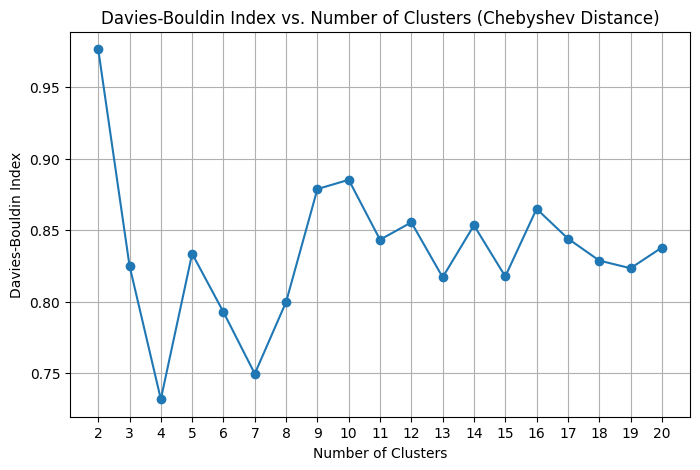

Minimum DBI Score 0.7318189185492159


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lists to store cluster numbers and DBI values
cluster = []
index = []

# Looping through different cluster numbers
for i in range(2, 21):
    KMean_loop = KMeans(n_clusters=i, random_state=0, n_init=10,init='random').fit(Data)
    labels_loop = KMean_loop.labels_
    db_index = davies_bouldin_score_chebyshev(Data, labels_loop)  # Use custom Chebyshev DBI function
    cluster.append(i)
    index.append(db_index)

# Plotting the DBI vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster, index, marker='o', linestyle='-')
plt.xticks(range(2, 21))  # Set x-axis ticks to be integers from 2 to 20
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters (Chebyshev Distance)')
plt.grid(True)
plt.show()

print('Minimum DBI Score',min(index))

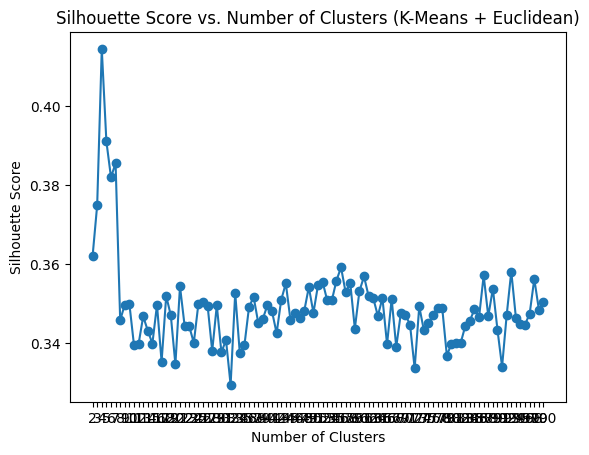

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lists to store cluster numbers and Silhouette scores
cluster = []
silhouette_scores = []

# Loop over different cluster numbers
for i in range(2, 101):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(Data)
    labels = kmeans.labels_
    score = silhouette_score(Data, labels, metric="chebyshev")  # Use Euclidean metric
    cluster.append(i)
    silhouette_scores.append(score)

# Plot Silhouette Score vs. Number of Clusters
plt.plot(cluster, silhouette_scores, marker='o')
plt.xticks(np.arange(2, 101, 1))  # Ensure x-axis is integers from 2 to 20
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (K-Means + Euclidean)')
plt.show()

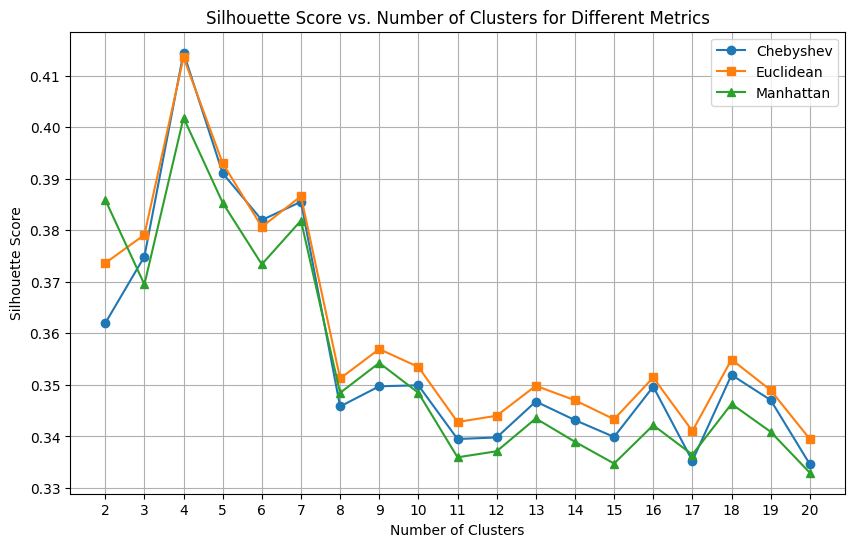

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cityblock

# Lists to store cluster numbers and silhouette scores for different metrics
cluster = list(range(2, 21))
silhouette_chebyshev = []
silhouette_euclidean = []
silhouette_manhattan = []
silhouette_mehalanobis = []

# Loop over different cluster numbers
for i in cluster:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(Data)
    labels = kmeans.labels_

    # Compute Silhouette scores for different metrics
    silhouette_chebyshev.append(silhouette_score(Data, labels, metric="chebyshev"))
    silhouette_euclidean.append(silhouette_score(Data, labels, metric="euclidean"))
    silhouette_manhattan.append(silhouette_score(Data, labels, metric="manhattan"))
    #silhouette_mehalanobis.append(silhouette_score(Data, labels, metric="mahalanobis"))
# Plot Silhouette Score vs. Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster, silhouette_chebyshev, marker='o', label='Chebyshev')
plt.plot(cluster, silhouette_euclidean, marker='s', label='Euclidean')
plt.plot(cluster, silhouette_manhattan, marker='^', label='Manhattan')
#plt.plot(cluster, silhouette_mehalanobis, marker='+', label='Mahalanobis')
plt.xticks(np.arange(2, 21, 1))  # Ensure x-axis is integers from 2 to 20
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Metrics')
plt.legend()
plt.grid(True)
plt.show()


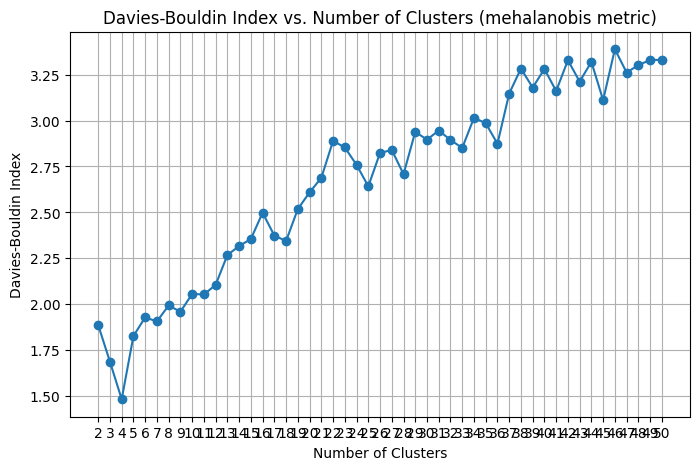

1.482488840297615


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_X_y
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import _safe_indexing
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv, LinAlgError

def compute_inverse_covariance(X):
    """Compute the inverse of the covariance matrix."""
    try:
        cov_matrix = np.cov(X.T)  # Compute covariance matrix
        inv_cov_matrix = inv(cov_matrix)  # Invert the covariance matrix
        return inv_cov_matrix
    except LinAlgError:  # Handle singular matrices
        return np.linalg.pinv(cov_matrix)

def pairwise_mahalanobis_distances(X, inv_cov_matrix):
    """Compute Mahalanobis distance between all pairs in X."""
    return np.array([[mahalanobis(x, y, inv_cov_matrix) for y in X] for x in X])

def davies_bouldin_score_mahalanobis(X, labels):
    """Compute the Davies-Bouldin score using Mahalanobis distance."""
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)

    intra_dists = np.zeros(n_labels)
    centroids = np.zeros((n_labels, X.shape[1]), dtype=float)
    inv_cov_matrix = compute_inverse_covariance(X)

    for k in range(n_labels):
        cluster_k = _safe_indexing(X, labels == k)
        centroid = cluster_k.mean(axis=0)
        centroids[k] = centroid
        intra_dists[k] = np.mean([mahalanobis(point, centroid, inv_cov_matrix) for point in cluster_k])

    centroid_distances = pairwise_mahalanobis_distances(centroids, inv_cov_matrix)

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    centroid_distances[centroid_distances == 0] = np.inf
    combined_intra_dists = intra_dists[:, None] + intra_dists
    scores = np.max(combined_intra_dists / centroid_distances, axis=1)

    return np.mean(scores)

# Lists to store cluster numbers and DBI values
cluster = []
index = []

# Loop over different cluster numbers
for i in range(2, 51):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(Data)
    labels = kmeans.labels_
    db_index = davies_bouldin_score_mahalanobis(Data, labels)  # Use Mahalanobis-based DBI
    cluster.append(i)
    index.append(db_index)

# Plotting the DBI vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster, index, marker='o', linestyle='-')
plt.xticks(range(2, 51))  # Set x-axis ticks to be integers from 2 to 20
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters (mehalanobis metric)')
plt.grid(True)
plt.show()

print(min(index))


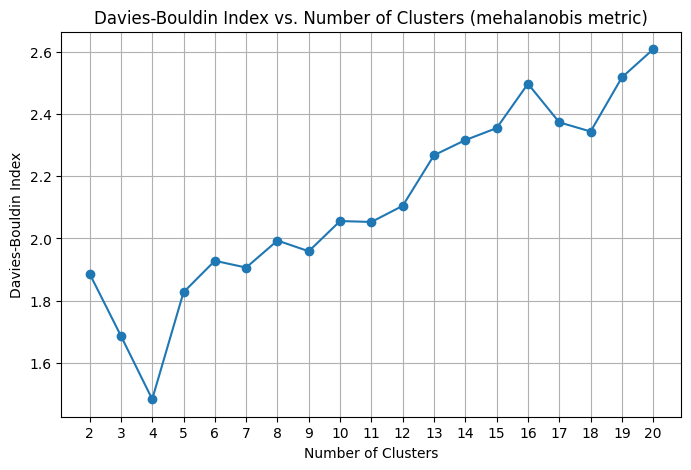

1.482488840297615


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_X_y
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import _safe_indexing
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv, LinAlgError

def compute_inverse_covariance(X):
    """Compute the inverse of the covariance matrix."""
    try:
        cov_matrix = np.cov(X.T)  # Compute covariance matrix
        inv_cov_matrix = inv(cov_matrix)  # Invert the covariance matrix
        return inv_cov_matrix
    except LinAlgError:  # Handle singular matrices
        return np.linalg.pinv(cov_matrix)

def pairwise_mahalanobis_distances(X, inv_cov_matrix):
    """Compute Mahalanobis distance between all pairs in X."""
    return np.array([[mahalanobis(x, y, inv_cov_matrix) for y in X] for x in X])

def davies_bouldin_score_mahalanobis(X, labels):
    """Compute the Davies-Bouldin score using Mahalanobis distance."""
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)

    intra_dists = np.zeros(n_labels)
    centroids = np.zeros((n_labels, X.shape[1]), dtype=float)
    inv_cov_matrix = compute_inverse_covariance(X)

    for k in range(n_labels):
        cluster_k = _safe_indexing(X, labels == k)
        centroid = cluster_k.mean(axis=0)
        centroids[k] = centroid
        intra_dists[k] = np.mean([mahalanobis(point, centroid, inv_cov_matrix) for point in cluster_k])

    centroid_distances = pairwise_mahalanobis_distances(centroids, inv_cov_matrix)

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    centroid_distances[centroid_distances == 0] = np.inf
    combined_intra_dists = intra_dists[:, None] + intra_dists
    scores = np.max(combined_intra_dists / centroid_distances, axis=1)

    return np.mean(scores)

# Lists to store cluster numbers and DBI values
cluster = []
index = []

# Loop over different cluster numbers
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(Data)
    labels = kmeans.labels_
    db_index = davies_bouldin_score_mahalanobis(Data, labels)  # Use Mahalanobis-based DBI
    cluster.append(i)
    index.append(db_index)

# Plotting the DBI vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster, index, marker='o', linestyle='-')
plt.xticks(range(2, 21))  # Set x-axis ticks to be integers from 2 to 20
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters (mehalanobis metric)')
plt.grid(True)
plt.show()

print(min(index))
